In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
df = pd.read_csv(Path.cwd().parent / "data" / "bronze" / "online_retail_II.csv")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# Verificação e remoção de duplicatas
df.drop_duplicates(inplace=True)
print(f" Contagem de  duplicatas finais igual a {df.duplicated().sum()}")

 Contagem de  duplicatas finais igual a 0


In [7]:
# renomear as colunas para snake-case
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns


Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

In [8]:
# Organizar o dataset em datatime, separar em colunas e limpar tempos nulos.

def _find_column(df, target_name: str) -> str:
    def _norm(s: str) -> str:
        return "".join(ch for ch in s.lower() if ch.isalnum())

    target_norm = _norm(target_name)
    for col in df.columns:
        if _norm(col) == target_norm:
            return col
    raise KeyError(f"Coluna referente a '{target_name}' não encontrada. Colunas disponíveis: {list(df.columns)}")

invoice_date_col = _find_column(df, "InvoiceDate")

df[invoice_date_col] = pd.to_datetime(df[invoice_date_col], errors="coerce")

df["invoice_year"] = df[invoice_date_col].dt.year
df["invoice_month"] = df[invoice_date_col].dt.month
df["invoice_week_day"] = df[invoice_date_col].dt.weekday
df["invoice_day"] = df[invoice_date_col].dt.day
df["invoice_hour"] = df[invoice_date_col].dt.hour
df["invoice_minutes"] = df[invoice_date_col].dt.minute

df = df.dropna(subset=[invoice_date_col]).copy()
df


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,invoice_year,invoice_month,invoice_week_day,invoice_day,invoice_hour,invoice_minutes
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,1,7,45
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,1,7,45
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,1,7,45
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,1,7,45
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,1,7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,4,9,12,50
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,4,9,12,50
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,4,9,12,50
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,4,9,12,50


In [9]:
# Removendo compras canceladas do dataset
shape_before = df.shape
df = df[~df["invoice"].astype(str).str.startswith("C")].copy()
df.shape, shape_before


((1013932, 14), (1033036, 14))

In [10]:
# Realizando controle de outliers
q_high_qty = df["quantity"].quantile(0.995)
q_high_price = df["price"].quantile(0.995)
df = df[(df["quantity"] <= q_high_qty) & (df["price"] <= q_high_price)].copy()
df.shape


(1004531, 14)

In [11]:
# Remoção de valores negativos como preço e numero de produtos
print(df.shape)
df = df[(df["quantity"] > 0) & (df["price"] > 0)].copy()
df.shape


(1004531, 14)


(998670, 14)

In [12]:
# Verificação de valores nulos final
print(df.isnull().sum())

invoice                  0
stockcode                0
description              0
quantity                 0
invoicedate              0
price                    0
customer_id         225854
country                  0
invoice_year             0
invoice_month            0
invoice_week_day         0
invoice_day              0
invoice_hour             0
invoice_minutes          0
dtype: int64


In [13]:
# Remoção da coluna 'customer_id' devido à baixa influência e alto número de nulos
if "customer_id" in df.columns:
    df = df.drop(columns=["customer_id"]).copy()

df.columns


Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'country', 'invoice_year', 'invoice_month', 'invoice_week_day',
       'invoice_day', 'invoice_hour', 'invoice_minutes'],
      dtype='object')

In [14]:
# Ultima verificação atrás de nulos
df.isnull().sum()

invoice             0
stockcode           0
description         0
quantity            0
invoicedate         0
price               0
country             0
invoice_year        0
invoice_month       0
invoice_week_day    0
invoice_day         0
invoice_hour        0
invoice_minutes     0
dtype: int64

In [ ]:
# Calculos de médias, modas e medianas

df[["price","quantity"]].describe()

,price,quantity
0,6.95,12
1,6.75,12
2,6.75,12
3,2.10,48
4,1.25,24
...,...,...
1067366,2.10,6
1067367,4.15,4
1067368,4.15,4
1067369,4.95,3


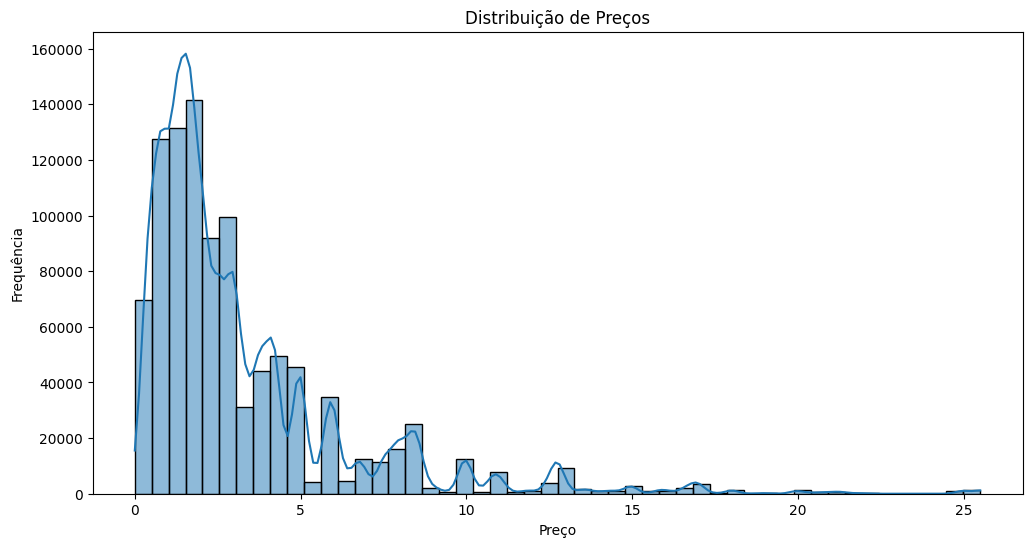

In [ ]:
# Visualização dos dados com histogramas
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribuição de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

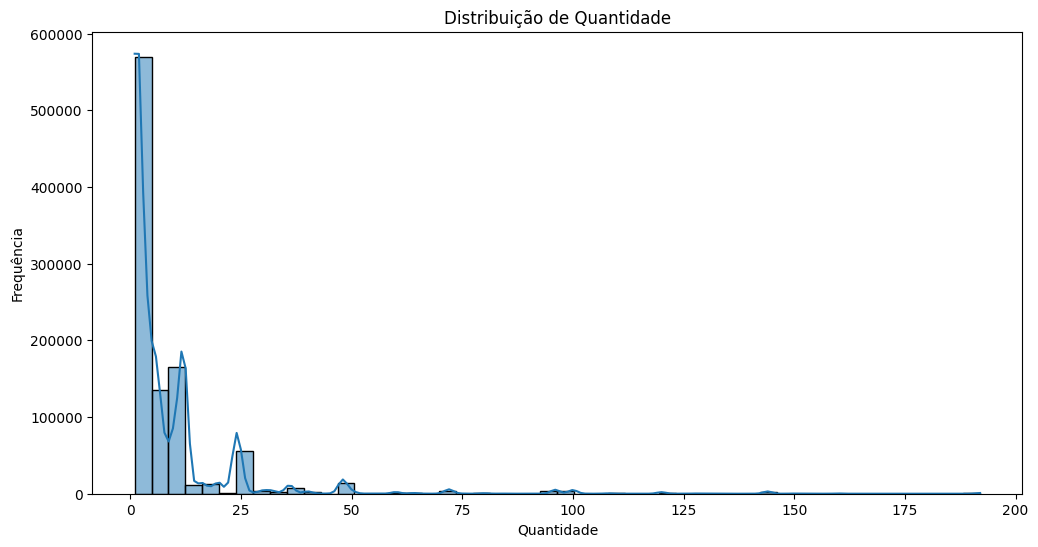

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df["quantity"], bins=50, kde=True)
plt.title("Distribuição de Quantidade")
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.show()


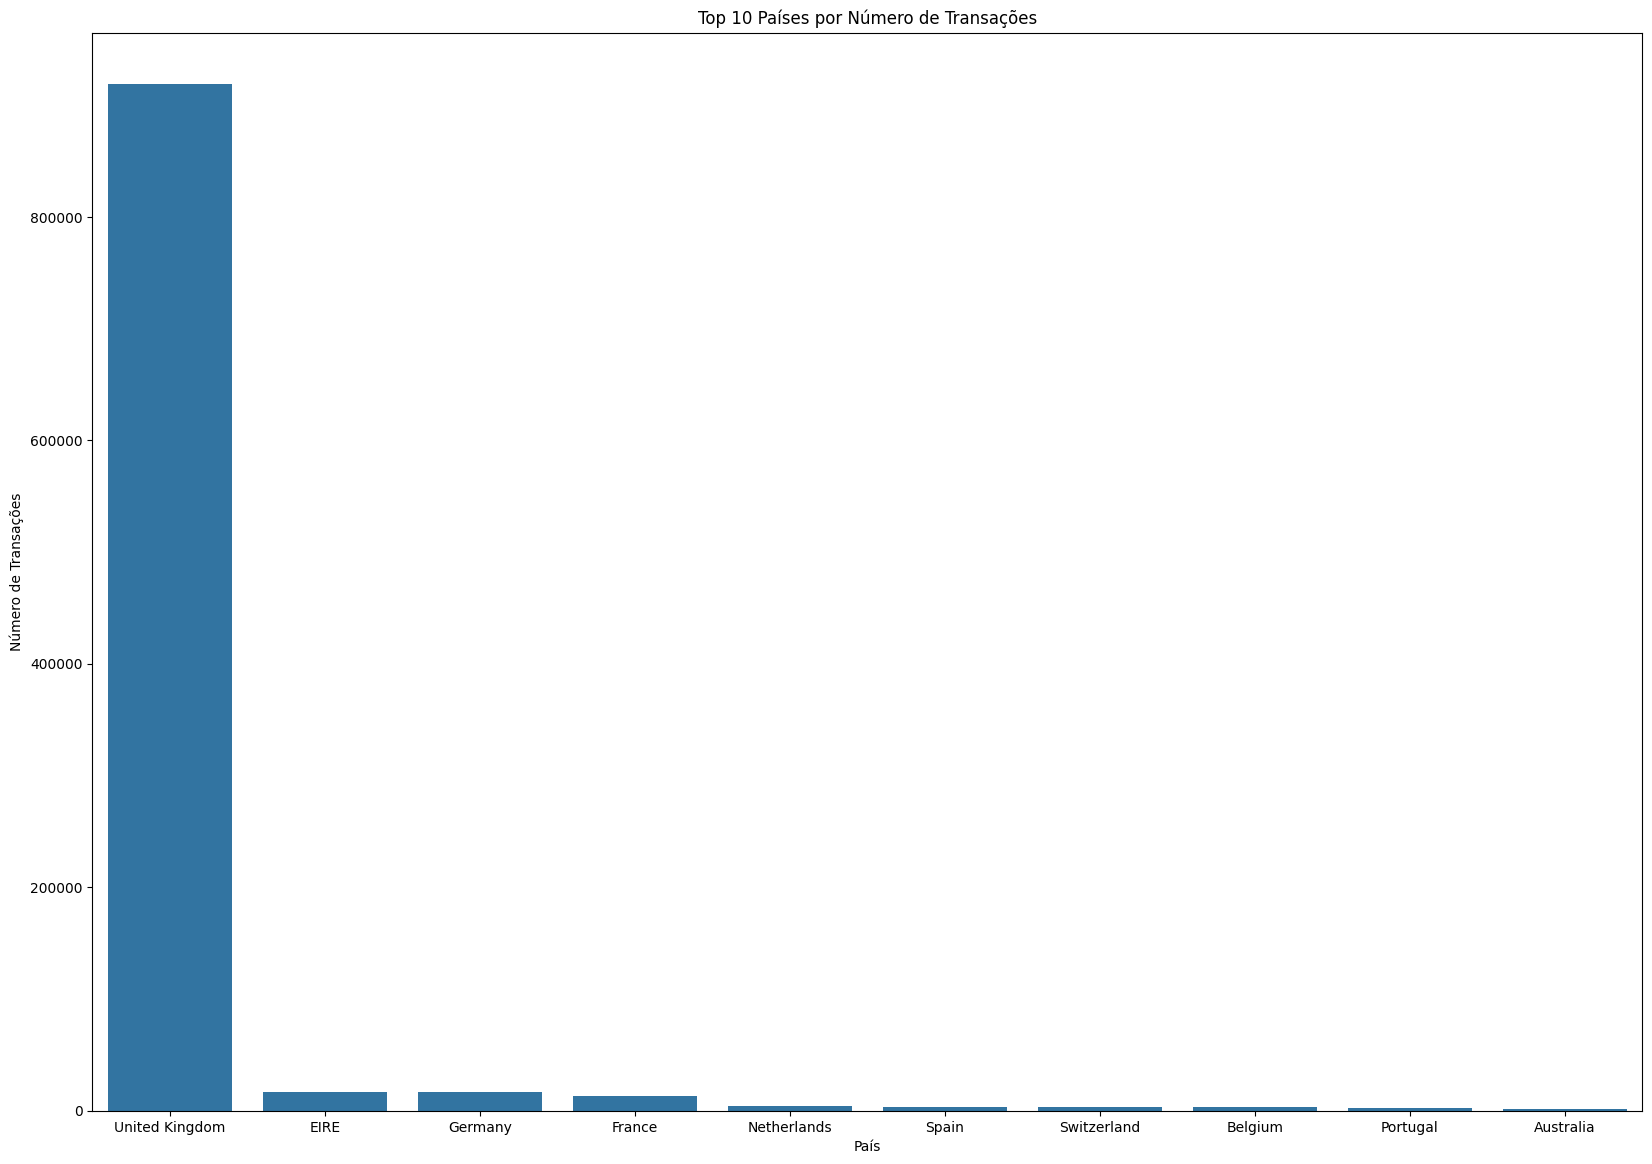

In [43]:
# Visualização dos dados com barplot
country_counts = df['country'].value_counts().head(10).reset_index()
country_counts.columns = ['country', 'count']
plt.figure(figsize=(20, 14))
sns.barplot(data=country_counts, x='country', y='count')
plt.title('Top 10 Países por Número de Transações')
plt.xlabel('País')
plt.ylabel('Número de Transações')
plt.show()

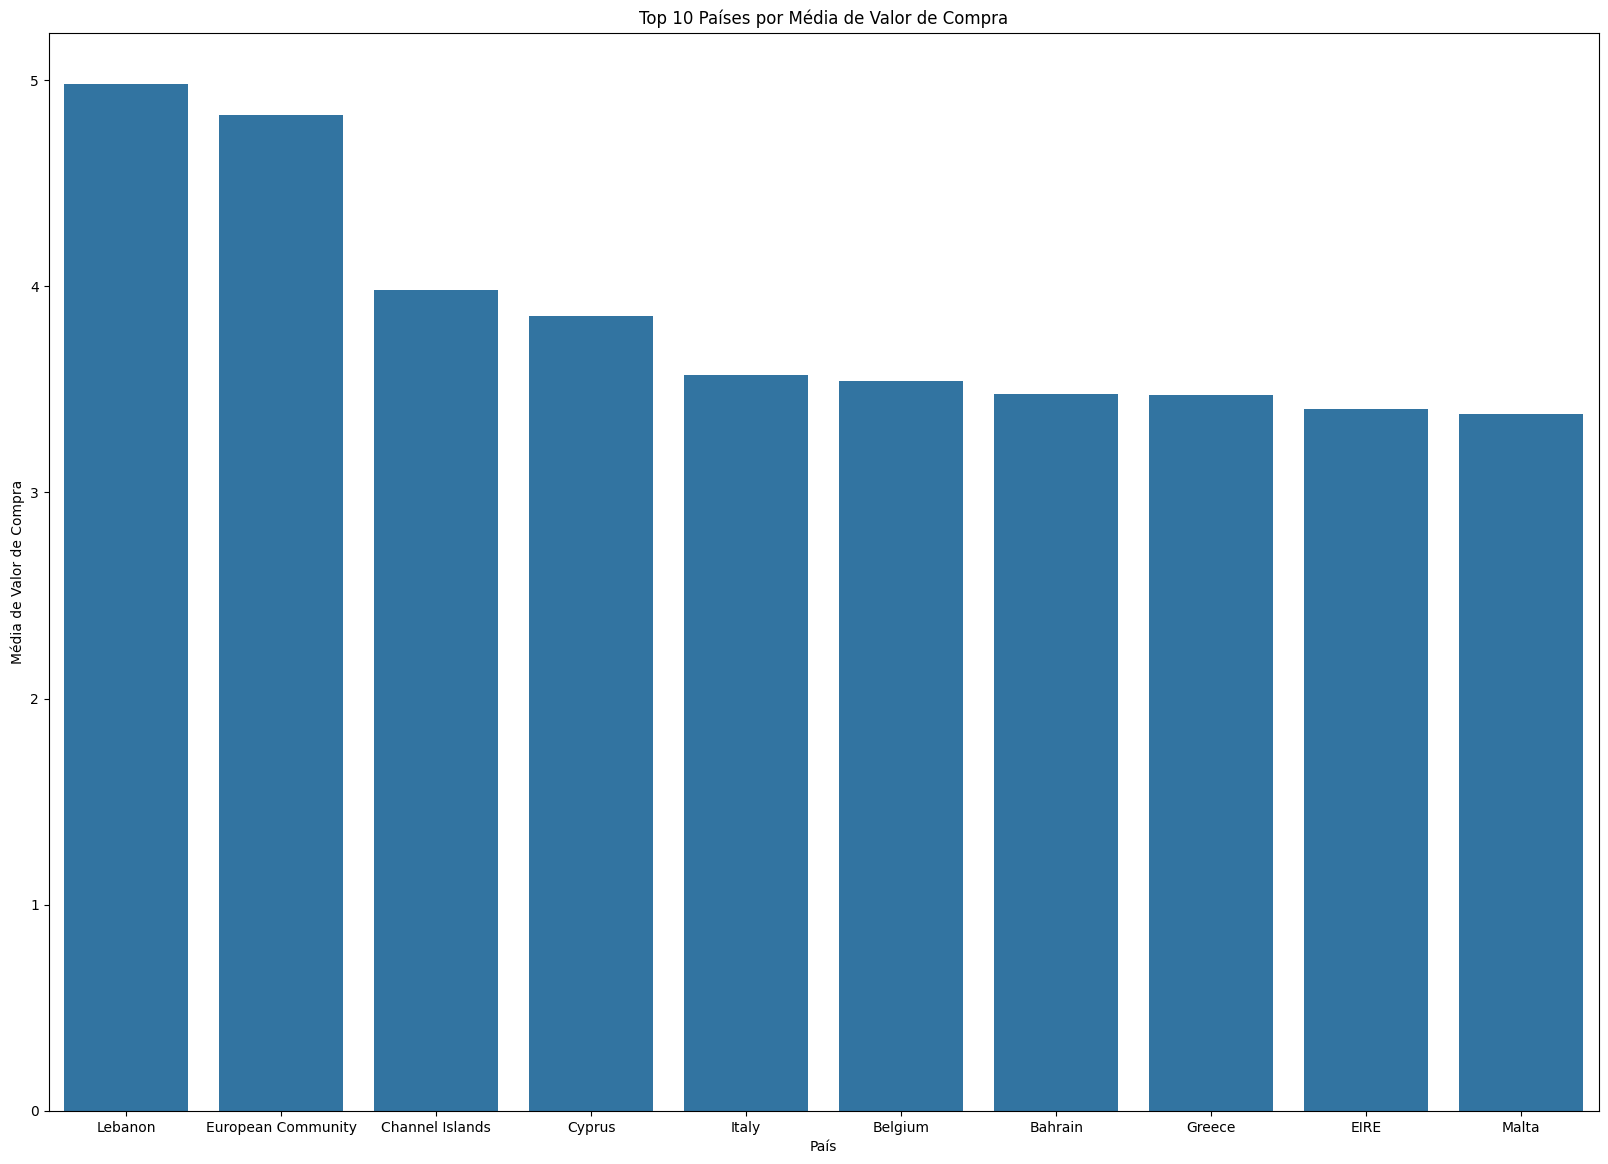

In [38]:
# Visualização dos dados média do valor de compra por país
country_price = df.groupby('country')['price'].mean().reset_index().sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(20, 14))
sns.barplot(data=country_price, x='country', y='price')
plt.title('Top 10 Países por Média de Valor de Compra')
plt.xlabel('País')
plt.ylabel('Média de Valor de Compra')
plt.show()

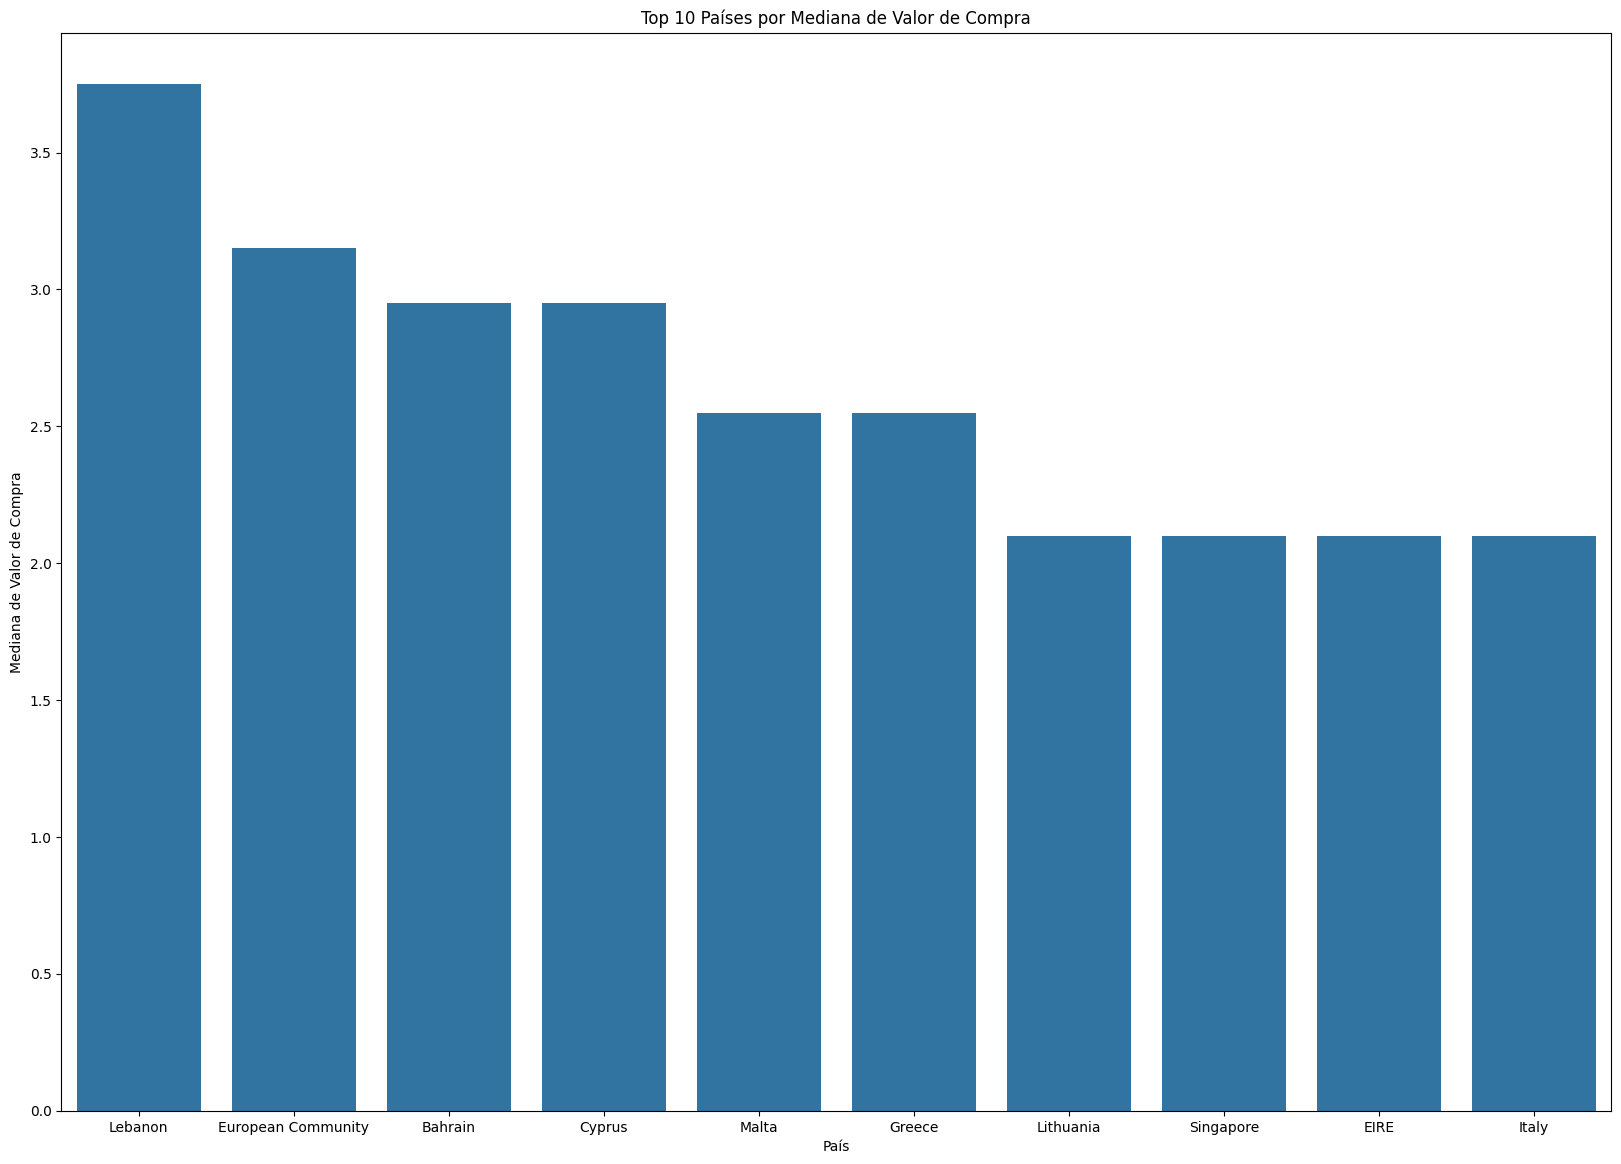

In [40]:
# Visualização dos dados Médiana do valor de compra por país
country_median_price = df.groupby('country')['price'].median().reset_index().sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(20, 14))
sns.barplot(data=country_median_price, x='country', y='price')
plt.title('Top 10 Países por Mediana de Valor de Compra')
plt.xlabel('País')
plt.ylabel('Mediana de Valor de Compra')
plt.show()

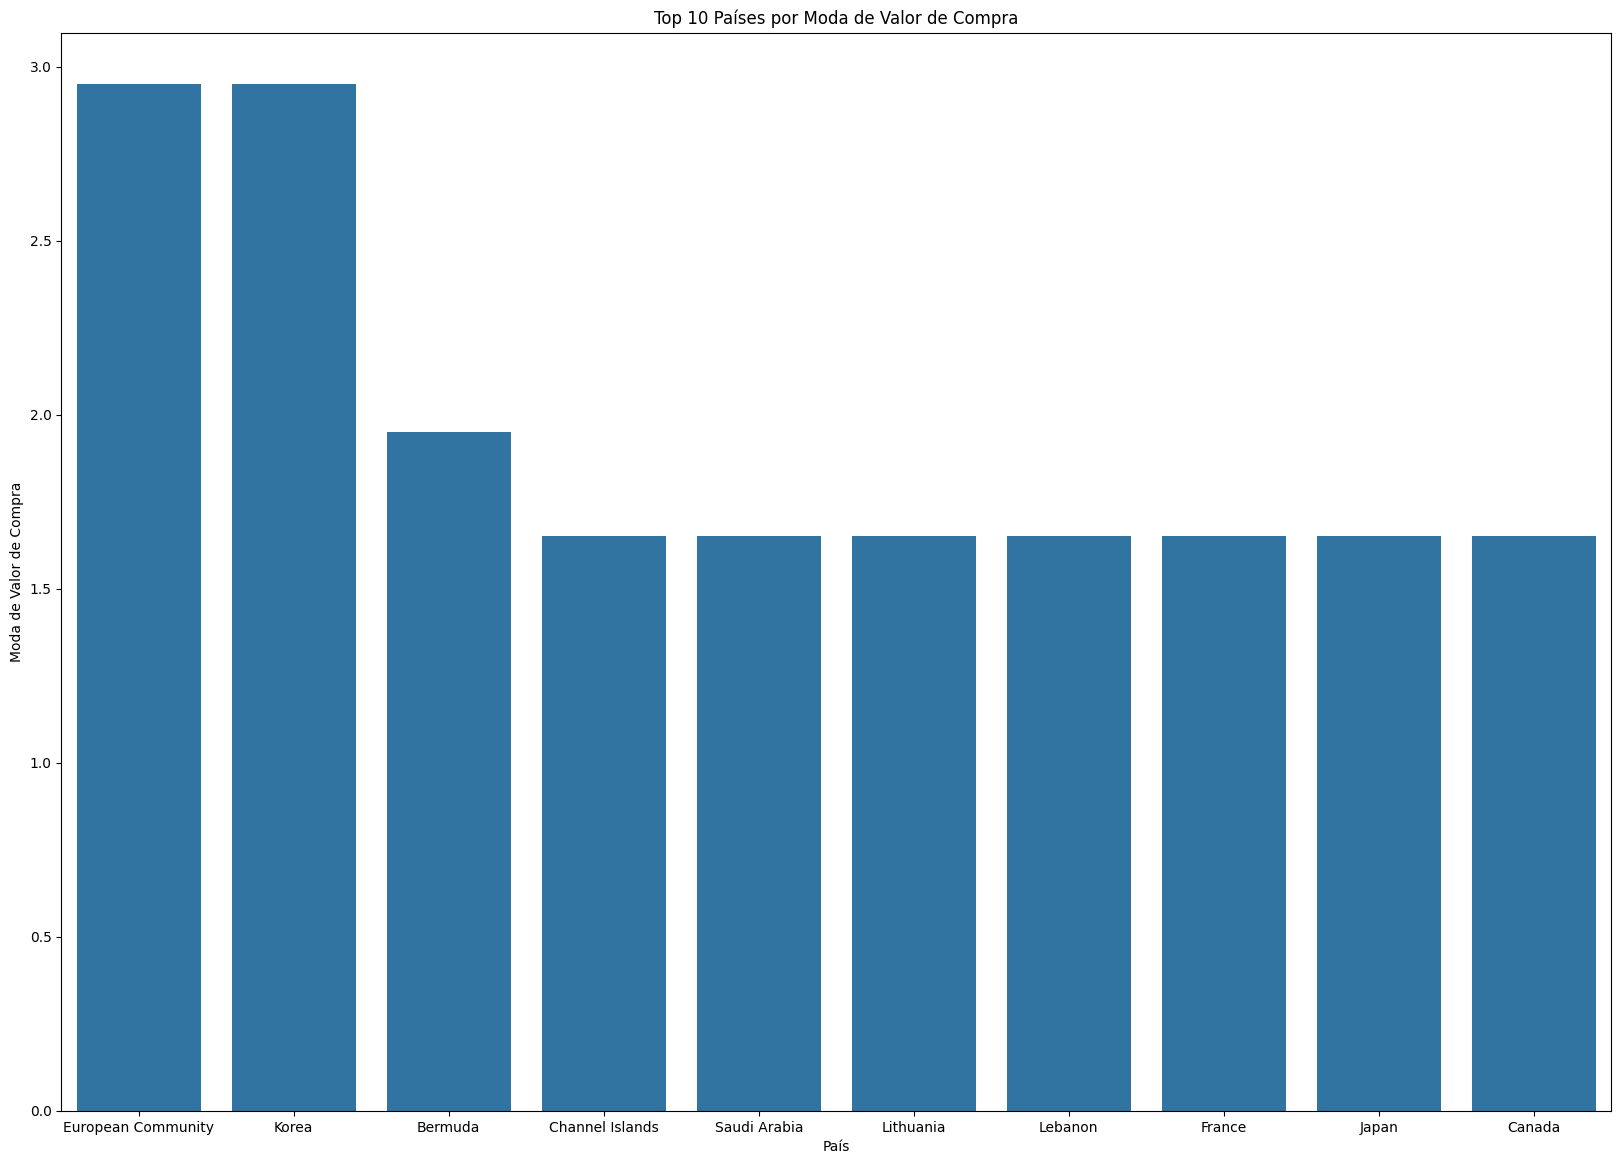

In [44]:
# Visualização dos dados Moda valor de compra por país
country_mode_price = df.groupby('country')['price'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index().sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(20, 14))
sns.barplot(data=country_mode_price, x='country', y='price')
plt.title('Top 10 Países por Moda de Valor de Compra')
plt.xlabel('País')
plt.ylabel('Moda de Valor de Compra')
plt.show()

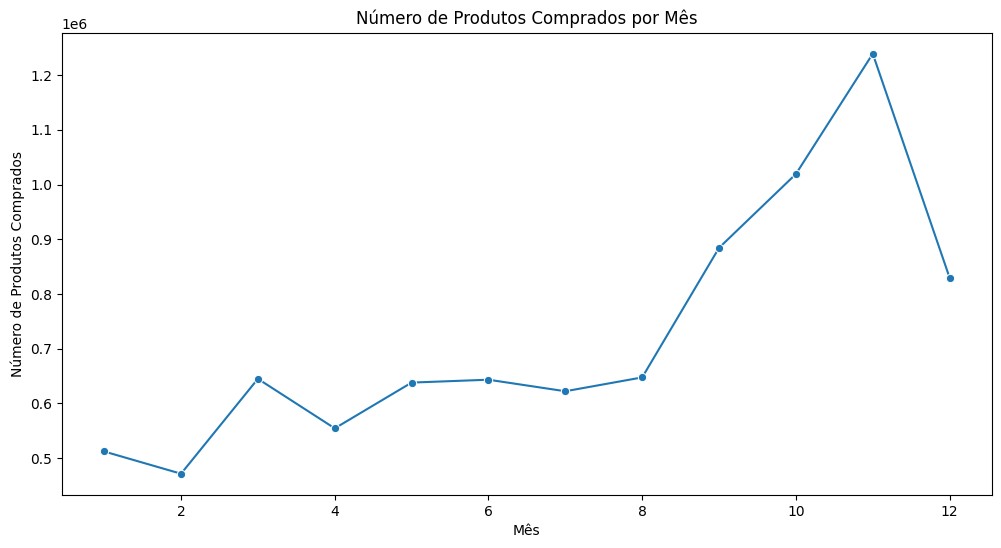

In [46]:
# Visualização dos dados de numeros de produtos comprados por mês
monthly_quantity = df.groupby('invoice_month')['quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quantity, x='invoice_month', y='quantity', marker='o')
plt.title('Número de Produtos Comprados por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Produtos Comprados')
plt.show()